<div class='alert alert-success'>
<h3>Prueba **IDATA**.</h3>
<h4>Ruben Eduardo Acosta</h4>
</div>

### Primero cargamos los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.simplefilter('ignore')

In [2]:
cartera =  pd.read_excel('./datos.xlsx')
cartera.head()

,cedula,oficina,categori,tiempode,monto,saldo,plazo,tasa,cuota,garantia,...,estadoci,sexo,personas,tipovivi,tipocont,aportes,numerocr,antigcoo,default,Cat
0,6754,Itagui,E,63,500000.0,411775.0,18,3.1667,36868,P,...,Unión Libre,Masculino,0,NaN,NaN,69000.0,1,6,Malo,E
1,17922,Laureles,E,65,2000000.0,1563604.0,24,3.2083,120761,P,...,Soltero,Masculino,0,NaN,NaN,0.0,1,6,Malo,E
2,167,Belen,E,60,800000.0,658843.0,18,3.1667,58990,P,...,Soltero,Femenino,0,NaN,NaN,82000.0,1,5,Malo,E
3,23093,Itagui,E,57,800000.0,744568.0,21,3.2083,52945,P,...,Casado,Masculino,0,Familiar,Término Indefinido,82000.0,1,5,Malo,E
4,16530,Belen,E,58,14153655.0,13567368.0,48,2.8750,547318,R,...,Casado,Masculino,2,Propia,NaN,300000.0,1,7,Malo,E


<div class='alert alert-info'>
<h3>Inspección de datos.</h3>
</div>

### Veamos cuales entradas tiene la tabla y de que tipo es cada dato

In [3]:
cartera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24786 entries, 0 to 24785
Data columns (total 30 columns):
cedula      24786 non-null int64
oficina     24786 non-null object
categori    24786 non-null object
tiempode    24786 non-null int64
monto       24786 non-null float64
saldo       24786 non-null float64
plazo       24786 non-null int64
tasa        24786 non-null float64
cuota       24786 non-null int64
garantia    24786 non-null object
diasmora    24786 non-null int64
formapag    24786 non-null int64
reestruc    24786 non-null int64
edad        24786 non-null int64
ocupació    24786 non-null object
niveledu    24786 non-null object
ingtot      24786 non-null float64
egrtot      24786 non-null float64
estrato     24786 non-null int64
antigemp    24786 non-null int64
estadoci    24786 non-null object
sexo        24786 non-null object
personas    24786 non-null int64
tipovivi    20414 non-null object
tipocont    19595 non-null object
aportes     24786 non-null float64
numerocr    

In [4]:
# veamos cuantos usuarios son buenos y cuantos malos
cartera['default'].value_counts()

Bueno    24334
Malo       452
Name: default, dtype: int64

Tenemos que la mayoria de usuarios son buenos.

### Saquemos las columnas numéricas.

In [5]:
num = (cartera.dtypes == float) | (cartera.dtypes == int)
num = [x for x in num.index if num[x] == True]

cartera_num = cartera[num]
cartera_num.head()

,cedula,tiempode,monto,saldo,plazo,tasa,cuota,diasmora,formapag,reestruc,edad,ingtot,egrtot,estrato,antigemp,personas,aportes,numerocr,antigcoo
0,6754,63,500000.0,411775.0,18,3.1667,36868,1784,1,2,30,372315.0,0.0,3,6,0,69000.0,1,6
1,17922,65,2000000.0,1563604.0,24,3.2083,120761,1758,1,2,38,900000.0,0.0,2,8,0,0.0,1,6
2,167,60,800000.0,658843.0,18,3.1667,58990,1677,1,2,57,800000.0,0.0,4,14,0,82000.0,1,5
3,23093,57,800000.0,744568.0,21,3.2083,52945,1670,1,2,28,325000.0,80000.0,3,8,0,82000.0,1,5
4,16530,58,14153655.0,13567368.0,48,2.8750,547318,1621,1,2,46,2500000.0,1500000.0,5,0,2,300000.0,1,7


### Ahora veamos las columnas no numéricas.

In [6]:
obj = cartera.dtypes == object
obj = [x for x in obj.index if obj[x] == True]

cartera_obj = cartera[obj]
cartera_obj.head()

,oficina,categori,garantia,ocupació,niveledu,estadoci,sexo,tipovivi,tipocont,default,Cat
0,Itagui,E,P,Empleado,Bachillerato,Unión Libre,Masculino,NaN,NaN,Malo,E
1,Laureles,E,P,Empleado,Bachillerato,Soltero,Masculino,NaN,NaN,Malo,E
2,Belen,E,P,Empleado,Técnico,Soltero,Femenino,NaN,NaN,Malo,E
3,Itagui,E,P,Empleado,Bachillerato,Casado,Masculino,Familiar,Término Indefinido,Malo,E
4,Belen,E,R,Independiente,Universitario,Casado,Masculino,Propia,NaN,Malo,E


<div class='alert alert-warning'>
Veamos algunas características de nuestros datos, comenzando con los datos no numéricos.
<div>

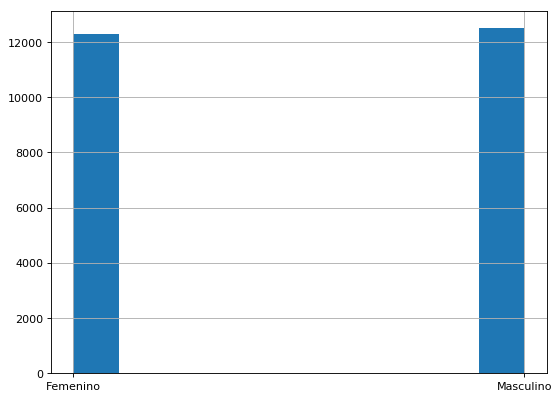

In [7]:
plt.figure(figsize=(8, 6), dpi=80)
cartera_obj['sexo'].hist()

Vemos que en promedio hay igual cantidad de hombres y de mujeres.

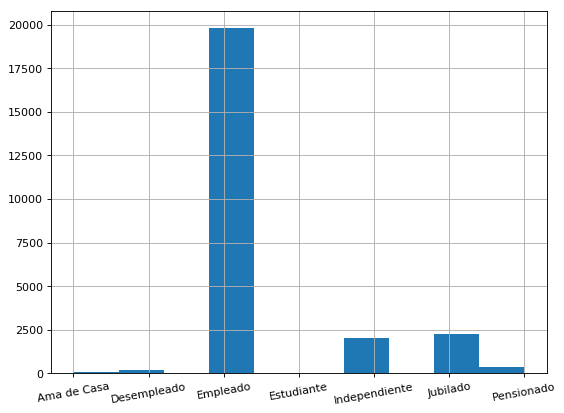

In [8]:
plt.figure(figsize=(8, 6), dpi=80)
cartera_obj['ocupació'].hist()
plt.xticks(rotation=10);

Tenemos que la mayoria de los usuarios son empleados.

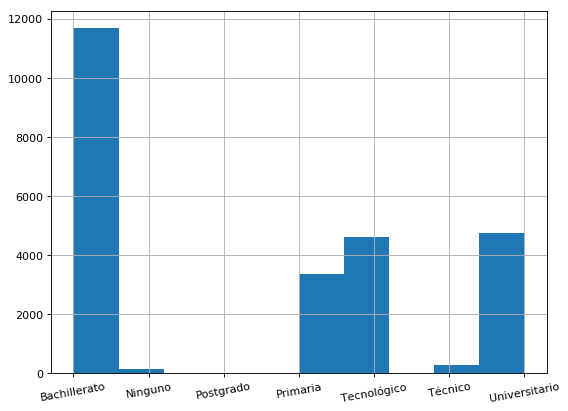

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
cartera_obj['niveledu'].hist()
plt.xticks(rotation=10);

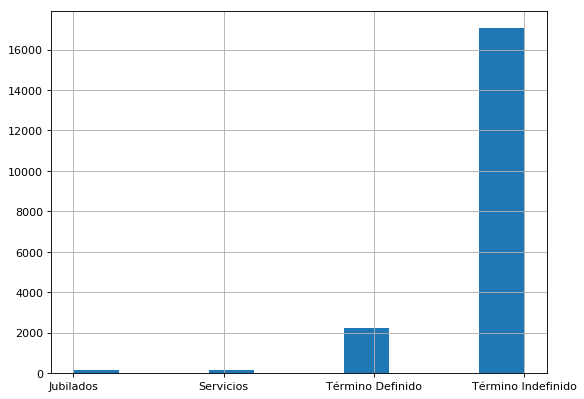

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
cartera_obj['tipocont'].hist()

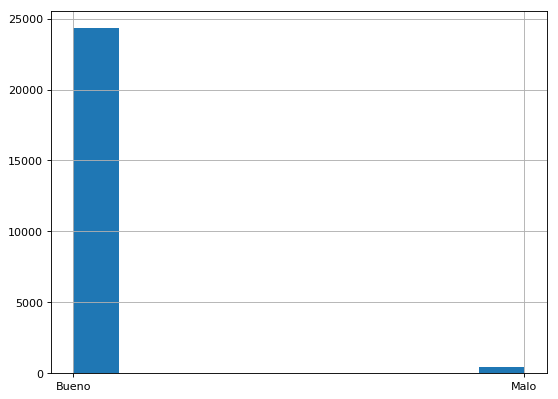

In [11]:
plt.figure(figsize=(8, 6), dpi=80)
cartera_obj['default'].hist()

#### Vemos que en su mayoria los usuarios son buenos. ahora estudiamos como son en función de algunas features.

### 1. En función del sexo.

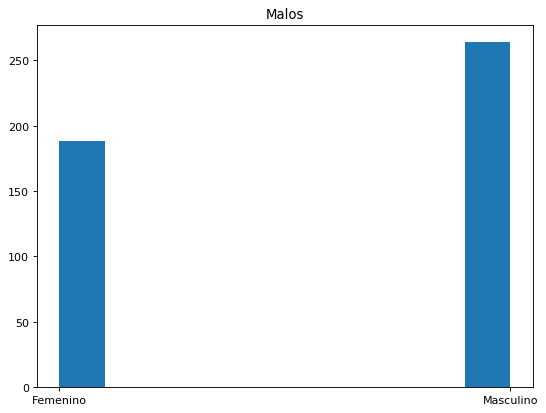

In [13]:
maskMalos = cartera['default'] == 'Malo'
malos = cartera['sexo'][maskMalos]

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(malos.tolist())
plt.title('Malos');

Vemos que practicamente es la misma cantidad de hombres y de mujeres los que son malos, así que el sexo no es un feature que nos ayude a predecir si es bueno o malo.

### 2. En función de la ocupación

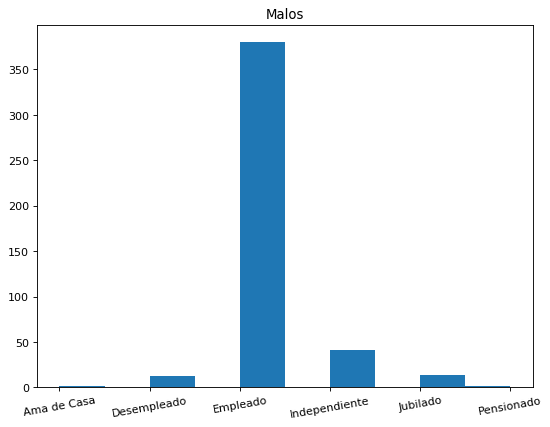

In [15]:
maskMalos = cartera['default'] == 'Malo'
malos = cartera['ocupació'][maskMalos]

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(malos.tolist())
plt.title('Malos')
plt.xticks(rotation=10);

Aquí si podemos ver una marcada diferencia con los empleados, pero como la mayoria de datos de entrada es de empleados, no podemos concluir que si alguien es empleado sera malo.

### 3. En función del nivel educativo.

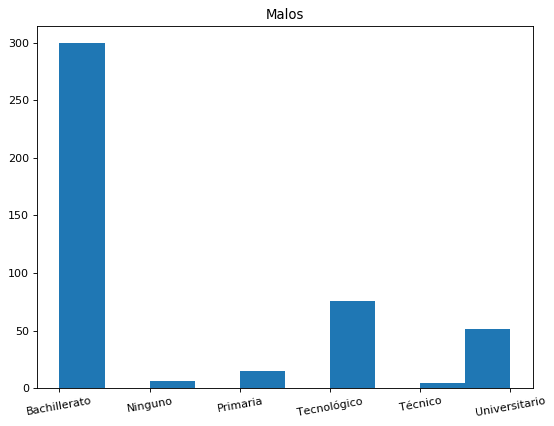

In [16]:
maskMalos = cartera['default'] == 'Malo'
malos = cartera['niveledu'][maskMalos]

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(malos.tolist())
plt.title('Malos')
plt.xticks(rotation=10);

Al igual que en el caso anterior, vemos que la mayoria de malo son de bachillerato, pero como la mayoria de entradas tienen esta tendencia, tampoco se puede concluir que si alguien es de bachillerato sera malo.

<div class='alert alert-warning'>
<h3> Miremos los datos numéricos</h3>
</div>

In [17]:
cartera_num.describe()

,cedula,tiempode,monto,saldo,plazo,tasa,cuota,diasmora,formapag,reestruc,edad,ingtot,egrtot,estrato,antigemp,personas,aportes,numerocr,antigcoo
count,24786.000000,24786.000000,2.478600e+04,2.478600e+04,24786.000000,24786.000000,2.478600e+04,24786.000000,24786.000000,24786.000000,24786.000000,2.478600e+04,2.478600e+04,24786.000000,24786.000000,24786.000000,2.478600e+04,24786.000000,24786.000000
mean,12393.500000,9.540991,3.213142e+06,2.380017e+06,28.003591,2.171466,1.452418e+05,13.893367,1.082264,1.998991,41.081941,1.068715e+06,3.603203e+05,2.816711,7.761398,1.231179,8.450637e+04,2.163116,3.228758
std,7155.246222,8.104833,3.052971e+06,2.641900e+06,11.567857,0.065144,9.423052e+04,71.817455,0.274772,0.031744,11.147799,7.854969e+05,4.074228e+05,0.798180,8.080238,1.237067,9.694064e+04,1.232528,2.692101
min,1.000000,-11.000000,1.010830e+05,1.900000e+01,2.000000,0.162500,2.224700e+04,0.000000,1.000000,1.000000,19.000000,0.000000e+00,0.000000e+00,0.000000,-1.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,6197.250000,3.000000,1.500000e+06,8.768670e+05,18.000000,2.174200,9.518100e+04,0.000000,1.000000,2.000000,32.000000,6.000000e+05,1.200000e+05,2.000000,1.000000,0.000000,1.550000e+04,1.000000,1.000000
50%,12393.500000,8.000000,2.500000e+06,1.669316e+06,24.000000,2.174200,1.210540e+05,0.000000,1.000000,2.000000,40.000000,8.639820e+05,3.000000e+05,3.000000,6.000000,1.000000,3.100000e+04,2.000000,2.000000
75%,18589.750000,14.000000,4.000000e+06,2.960205e+06,36.000000,2.174200,1.640762e+05,10.000000,1.000000,2.000000,49.000000,1.285000e+06,5.000000e+05,3.000000,11.000000,2.000000,1.550000e+05,3.000000,5.000000
max,24786.000000,68.000000,6.180000e+07,5.931241e+07,180.000000,3.300000,2.080188e+06,1784.000000,2.000000,2.000000,83.000000,1.510000e+07,1.180000e+07,6.000000,46.000000,25.000000,1.463000e+06,15.000000,49.000000


### Veamos la matriz de correlación para los datos numéricos.

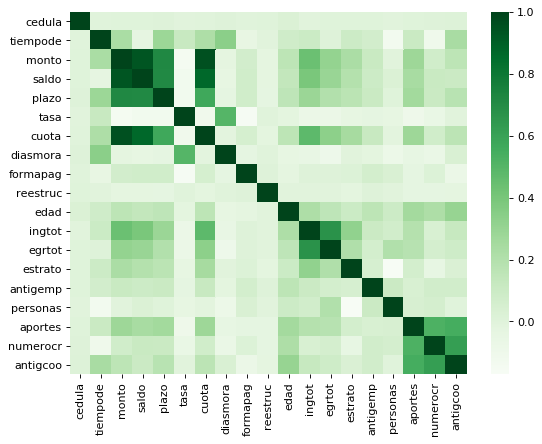

In [18]:
plt.figure(figsize=(8, 6), dpi=80)
sb.heatmap(cartera_num.corr(), cmap="Greens")

Vemos que en su mayoria los datos son independientes. Para ver la correlación de estos datos con nuestra variable objetivo **default**, transformemos esta en una variable numérica, y volvamos a ver la matriz de correlación.

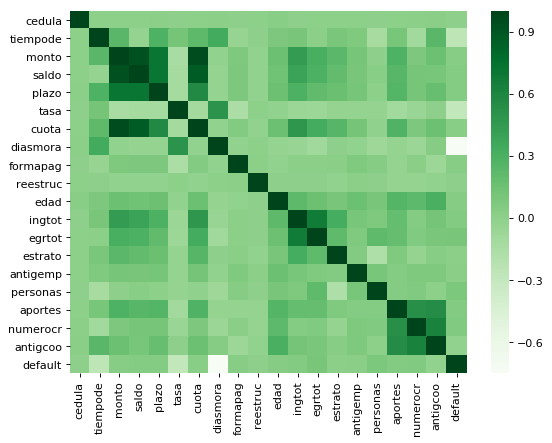

In [19]:
Y = cartera['default']

array = []
for i in Y:
    if (i == 'Malo'):
        array.append(0)
    else:
        array.append(1)

Y = pd.DataFrame(data=array,
                index=cartera.index,
                columns=['default'])

numerica2 = pd.concat([cartera_num, Y], axis=1)
plt.figure(figsize=(8, 6), dpi=80)
sb.heatmap(numerica2.corr(), cmap="Greens")

Concentrandonos en la última fila vemos que la variable objetivo esta bastante correlacionada con todos los datos, excepto con 'diasmora', 'tasa', 'tiempode', así que podemos sacar estas features de nuestros datos.

In [20]:
numerica2 = numerica2.drop('diasmora', axis=1)
numerica2 = numerica2.drop('tasa', axis=1)
numerica2 = numerica2.drop('tiempode', axis=1)

<div class='alert alert-info'>
<h3>Generemos un modelo predictivo a partir de las variables numéricas usando sklearn.</h3>
</div>

In [21]:
from sklearn.model_selection import train_test_split

Separamos nuestros datos en dos conjuntos, el de entrenamiendo y el de test

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(cartera_num, Y)
print('Longitud X: ', len(cartera_num))
print('Longitud xtrain: ', len(xtrain))
print('Longitud xtest: ', len(xtest))

Longitud X:  24786
Longitud xtrain:  18589
Longitud xtest:  6197


Usemos un modelo lineal, como por ejemplo el Lasso

In [23]:
from sklearn.linear_model import Lasso

model = Lasso()
# entrenamos el modelo
model.fit(xtrain, ytrain)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

([<matplotlib.axis.XTick at 0x7f350bfc3a90>,
 <a list of 2 Text xticklabel objects>)

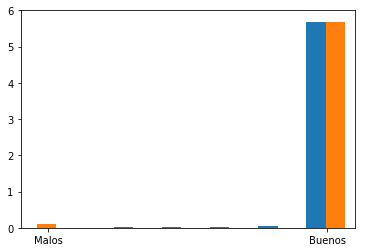

In [26]:
# Obtengamos nuestras predicciones.
predicted = model.predict(xtest)

plt.hist([predicted, ytest['default'].values.tolist()], normed=1)
plt.axis([-0.1, 1.1, 0, 6])
plt.xticks([0,1],['Malos', 'Buenos'])


Vemos que las predicciones del modelo (azul) estan muy de acuerdo con los datos de test (naranja)

Ahora podemos usar la función **predicted** para predecir si un cliente será bueno o malo a partir de nuevos datos de entrada.